# Final Project: Home Mortgage Disclosure Act

#### NAMES OF THE GROUP MEMBERS: Jiaying He, Jiacheng Hu, Jiayu Wang, Yijia Yang, Yuning Zhao

In [0]:
%pylab inline
import pandas as pd
import os
from ipypublish import nb_setup
from sklearn.base import clone

Populating the interactive namespace from numpy and matplotlib


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Project Description
Q: Explore this US national mortgage dataset and build predictions for loan approvals or denials. Then 

a) whether it can be used predicting loan approvals 

b) if so, identify data bias effects if any and how that impacts fairness 

c) If there is unfairness, outline the specifics and what could be changed?



Context: A research-ready data set of U.S. home mortgage loan applications, based on data from the federally mandated Home Mortgage Disclosure Act. In 2014, the most recent year for which data is available, there were about 11.7 million loan records reported by 7,062 financial institutions in 2014. These records include applications for home purchase, for home improvement, and for refinancing.


In [0]:
data = pd.concat(map(pd.read_csv,['hmda14a.csv','hmda14b.csv','hmda14c.csv']))

## Data Description
The Home Mortgage Disclosure Act (HMDA) requires all banks, savings and loans, savings banks and credit unions with assets of more than $33 million and offices in metropolitan areas to report mortgage applications. This act was enacted by Congress in 1975 and is implemented by the Federal Reserve Board's Regulation C with the goal of:

*	Helping the public determine whether financial institutions are serving the housing needs of their communities;
*	Informing public officials in distributing public-sector investments so as to attract private investment to areas where it is needed;
*	Identifying possible discriminatory lending patterns.

Data generated by HMDA provides information on lending practices. The main data set is the Loan Application Register (LAR), called HMDA on the download provided by NICAR. It contains demographic information about loan applicants, including race, gender and income; the purpose of the loan (i.e. home purchase or improvement); whether the buyer intends to live in the home; the type of loan (i.e. conventional, FHA insured, etc.); the field "Rate_Spread," showing the difference between Treasury security interest rate and the loan's interest rate; and the outcome of the loan application (i.e. approved or declined). The lenders are given the opportunity to note reasons for denial in three fields, but those are seldom used.


Important variables to consider:

'LOAN_TYPE',
'PROP_TYPE', 
'PURPOSE', 
'OCCUPANCY', 
'AMNT',
'PRE_APP', 
'ACTION',
'STATE',
'COUNTY', 
'APP_ETH', 
'COAPP_ETH', 
'APP_RACE1', 
'COAP_RACE1', 
'APP_SEX', 
'COAP_SEX',
'APP_INCCH','APP_INC', 

'PURCHTYPE', 
'DENIAL1', 


'SPREADCH', 'SPREAD'??

'HOEPA' ???

'LIENSTATUS',
'EDITSTATUS', ???
'SEQNO', ??

'POPCH', 'POP', 

'MINPOPCH', 'MINPOP', -% of minority pop for tarot
'MED_INCCH','MED_INC', - median income


'OWNOCCCH', 'OWNOCC', 
'OWNOCC4CH', 'OWNOCC4', 
'APP_FLAG'

In [0]:
print(data.columns)
print(data.shape)
data.head()

Index(['YEAR', 'RESP_ID', 'AGENCY', 'LOAN_TYPE', 'PROP_TYPE', 'PURPOSE', 'OCCUPANCY', 'AMNT', 'PRE_APP', 'ACTION', 'MA', 'STATE', 'COUNTY', 'TRACT', 'APP_ETH', 'COAPP_ETH', 'APP_RACE1', 'APP_RACE2', 'APP_RACE3', 'APP_RACE4', 'APP_RACE5', 'COAP_RACE1', 'COAP_RACE2', 'COAP_RACE3', 'COAP_RACE4', 'COAP_RACE5', 'APP_SEX', 'COAP_SEX', 'APP_INCCH', 'APP_INC', 'PURCHTYPE', 'DENIAL1', 'DENIAL2', 'DENIAL3', 'SPREADCH', 'SPREAD', 'HOEPA', 'LIENSTATUS', 'EDITSTATUS', 'SEQNO', 'POPCH', 'POP', 'MINPOPCH', 'MINPOP', 'MED_INCCH', 'MED_INC', 'TCT2MSACH', 'TCT2MSA', 'OWNOCCCH', 'OWNOCC', 'OWNOCC4CH', 'OWNOCC4', 'APP_FLAG'], dtype='object')
(11875464, 53)


,YEAR,RESP_ID,AGENCY,LOAN_TYPE,PROP_TYPE,PURPOSE,OCCUPANCY,AMNT,PRE_APP,ACTION,MA,STATE,COUNTY,TRACT,APP_ETH,COAPP_ETH,APP_RACE1,APP_RACE2,APP_RACE3,APP_RACE4,APP_RACE5,COAP_RACE1,COAP_RACE2,COAP_RACE3,COAP_RACE4,COAP_RACE5,APP_SEX,COAP_SEX,APP_INCCH,APP_INC,PURCHTYPE,DENIAL1,DENIAL2,DENIAL3,SPREADCH,SPREAD,HOEPA,LIENSTATUS,EDITSTATUS,SEQNO,POPCH,POP,MINPOPCH,MINPOP,MED_INCCH,MED_INC,TCT2MSACH,TCT2MSA,OWNOCCCH,OWNOCC,OWNOCC4CH,OWNOCC4,APP_FLAG
0,2014,0000001281,3,1,1,1,2,210,3,1,11260.0,2.0,20.0,5.00,2,5,5,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,1,5,214.0,214,3,NaN,NaN,NaN,NaN,\N,2,1,6.0,228,1988.0,1988,52.31,52.31,84900.0,84900,58.72,58.72,149.0,149,327.0,327,0
1,2014,0000001933,3,1,1,1,1,271,3,5,11260.0,2.0,20.0,27.02,2,2,5,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,1,2,86.0,86,0,NaN,NaN,NaN,NaN,\N,2,1,6.0,9,9670.0,9670,26.83,26.83,84900.0,84900,111.63,111.63,2926.0,2926,3554.0,3554,0
2,2014,0000002285,5,1,1,3,1,60,3,1,11260.0,2.0,20.0,17.32,3,3,6,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,1,2,77.0,77,0,NaN,NaN,NaN,NaN,\N,2,1,NaN,21,6179.0,6179,38.21,38.21,84900.0,84900,115.35,115.35,1778.0,1778,2199.0,2199,0
3,2014,0000002285,5,1,1,3,1,91,3,1,11260.0,2.0,20.0,27.12,2,2,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,1,2,176.0,176,0,NaN,NaN,NaN,NaN,\N,2,2,NaN,66,9068.0,9068,46.12,46.12,84900.0,84900,86.38,86.38,2152.0,2152,3002.0,3002,0
4,2014,0000002285,5,1,1,2,1,85,3,1,11260.0,2.0,20.0,26.03,2,2,5,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,1,2,142.0,142,0,NaN,NaN,NaN,NaN,\N,2,2,NaN,106,6341.0,6341,37.34,37.34,84900.0,84900,111.17,111.17,1892.0,1892,2177.0,2177,0


In [0]:
subset_data = data.sample(frac=0.5, replace=False, random_state=1)

In [0]:
subset_data.head()

,YEAR,RESP_ID,AGENCY,LOAN_TYPE,PROP_TYPE,PURPOSE,OCCUPANCY,AMNT,PRE_APP,ACTION,MA,STATE,COUNTY,TRACT,APP_ETH,COAPP_ETH,APP_RACE1,APP_RACE2,APP_RACE3,APP_RACE4,APP_RACE5,COAP_RACE1,COAP_RACE2,COAP_RACE3,COAP_RACE4,COAP_RACE5,APP_SEX,COAP_SEX,APP_INCCH,APP_INC,PURCHTYPE,DENIAL1,DENIAL2,DENIAL3,SPREADCH,SPREAD,HOEPA,LIENSTATUS,EDITSTATUS,SEQNO,POPCH,POP,MINPOPCH,MINPOP,MED_INCCH,MED_INC,TCT2MSACH,TCT2MSA,OWNOCCCH,OWNOCC,OWNOCC4CH,OWNOCC4,APP_FLAG
515484,2014,0000002747,1,1,2,1,1,133,3,1,23844.0,18.0,73.0,1004.00,1,2,5,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,1,2,49.0,49,1,NaN,NaN,NaN,1.86,1.86,2,1,NaN,3302,1490.0,1490,19.19,19.19,63700.0,63700,90.86,90.86,374.0,374,525.0,525,0
2581009,2014,0000852218,9,1,1,3,1,168,3,1,47380.0,48.0,309.0,37.06,2,2,5,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,1,2,120.0,120,1,NaN,NaN,NaN,NaN,\N,2,1,NaN,309322,9038.0,9038,29.58,29.58,54100.0,54100,146.07,146.07,2364.0,2364,2951.0,2951,0
3251563,2014,28211,3,1,1,1,1,195,3,3,NaN,17.0,137.0,9519.00,2,5,5,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,2,5,60.0,60,0,NaN,NaN,NaN,NaN,\N,2,1,NaN,320,4861.0,4861,5.18,5.18,58600.0,58600,155.26,155.26,1640.0,1640,2034.0,2034,0
616961,2014,480228,9,1,1,3,2,198,3,3,31084.0,6.0,37.0,1393.03,2,5,5,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,1,5,290.0,290,0,1.0,NaN,NaN,NaN,\N,2,1,NaN,42375,4186.0,4186,46.23,46.23,60600.0,60600,98.04,98.04,725.0,725,390.0,390,0
2389529,2014,504713,9,1,1,1,1,408,3,6,15764.0,25.0,17.0,3141.01,4,4,7,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,4,4,NaN,\N,0,NaN,NaN,NaN,NaN,\N,2,4,NaN,63675,6055.0,6055,12.98,12.98,93300.0,93300,86.57,86.57,1787.0,1787,1919.0,1919,2


In [0]:
print(subset_data.shape)

(5937732, 53)


In [0]:
subset_data.isna().sum()

YEAR                0
RESP_ID             0
AGENCY              0
LOAN_TYPE           0
PROP_TYPE           0
PURPOSE             0
OCCUPANCY           0
AMNT                0
PRE_APP             0
ACTION              0
MA             820276
STATE          131737
COUNTY         159738
TRACT          180890
APP_ETH             0
COAPP_ETH           0
APP_RACE1           0
APP_RACE2     5912183
APP_RACE3     5936073
APP_RACE4     5937378
APP_RACE5     5937452
COAP_RACE1          0
COAP_RACE2    5928827
COAP_RACE3    5937257
COAP_RACE4    5937637
COAP_RACE5    5937647
APP_SEX             0
COAP_SEX            0
APP_INCCH      824959
APP_INC             0
PURCHTYPE           0
DENIAL1       5200996
DENIAL2       5783312
DENIAL3       5907140
SPREADCH      5694245
SPREAD              0
HOEPA               0
LIENSTATUS          0
EDITSTATUS    5004344
SEQNO               0
POPCH          181159
POP                 0
MINPOPCH       181189
MINPOP              0
MED_INCCH      180890
MED_INC   

In [0]:
subset_data = subset_data.loc[:, subset_data.isnull().mean() <= .3]

In [0]:
subset_data['LOAN_TYPE'] = subset_data.LOAN_TYPE.apply(lambda x: 'conventional' if x ==1 else 'FHA-insured' if x ==2 \
                                                else 'VA-guaranteed' if x == 3 else 'FSA/RHS')

In [0]:
subset_data['PROP_TYPE'] = subset_data.PROP_TYPE.apply(lambda x: '1-4 family' if x ==1 else 'manufactured housing' if x==2 \
else 'multifamily')

In [0]:
subset_data['PURPOSE'] = subset_data.PURPOSE.apply(lambda x: 'home purchase' if x ==1 else 'home improvement' if x ==2\
                                                  else 'refinancing')

In [0]:
subset_data['PRE_APP'] = subset_data.PRE_APP.apply(lambda x: 'Approved' if x ==1 else 'not approved' if x ==2 else 'not applicable')

In [0]:
subset_data['APP_ETH'] = subset_data.APP_ETH.apply(lambda x: 'hispanic/latino' if x ==1 else 'Not hispanic/latino' if x==2\
                                                  else 'info not provided')

In [0]:
subset_data['COAPP_ETH'] = subset_data.COAPP_ETH.apply(lambda x: 'hispanic/latino' if x ==1 else 'Not hispanic/latino' if x==2\
                                                  else 'info not provided')

In [0]:
subset_data['APP_RACE1'] = subset_data.APP_RACE1.apply(lambda x: 'American Indian' if x ==1 else 'Asian' if x ==2 \
                                                      else 'Black' if x ==3 else 'Pacific Islander' if x ==4 \
                                                      else 'white' if x ==5 else 'not provided' if x ==6 else 'not applicable')

In [0]:
subset_data = subset_data[(subset_data.APP_RACE1 != 'not provided')&(subset_data.APP_RACE1 != 'not applicable')]

In [0]:
subset_data.APP_RACE1.value_counts()

white               3973594
Black                379982
Asian                273536
American Indian       41565
Pacific Islander      22986
Name: APP_RACE1, dtype: int64

In [0]:
len(subset_data)

4691663

In [0]:
subset_data['COAP_RACE1'] = subset_data.COAP_RACE1.apply(lambda x: 'American Indian' if x ==1 else 'Asian' if x ==2 \
                                                      else 'Black' if x ==3 else 'Pacific Islander' if x ==4 \
                                                      else 'white' if x ==5 else 'not provided' if x ==6 \
                                                    else 'not applicable' if x ==7 else 'no coapplicant')

In [0]:
subset_data.COAP_RACE1.value_counts()

no coapplicant      2572608
white               1831635
Asian                127375
Black                 94865
not provided          36903
American Indian       13775
Pacific Islander      12367
not applicable         2135
Name: COAP_RACE1, dtype: int64

In [0]:
#subset_data = subset_data[(subset_data.COAP_RACE1 != 'not provided')&(subset_data.COAP_RACE1 != 'not applicable')]

In [0]:
subset_data['APP_SEX'] = subset_data.APP_SEX.apply(lambda x: 'Male' if x ==1 else 'Female' if x ==2 else 'not provided'\
                                                  if x ==3 else 'not applicable')

In [0]:
subset_data = subset_data[(subset_data.APP_SEX == 'Male')|(subset_data.APP_SEX == 'Female')]

In [0]:
len(subset_data)

4679400

In [0]:
subset_data['COAP_SEX'] = subset_data.COAP_SEX.apply(lambda x: 'Male' if x ==1 else 'Female' if x ==2 else 'not provided'\
                                                  if x ==3 else 'not applicable' if x ==3 else 'no coapplicant' if x ==4\
                                                    else 'no co-applicant')

In [0]:
subset_data.COAP_SEX.value_counts()

no co-applicant    2565299
Female             1684050
Male                405752
not provided         20874
no coapplicant        3425
Name: COAP_SEX, dtype: int64

In [0]:
subset_data['LIENSTATUS'] = subset_data.LIENSTATUS.apply(lambda x: 'first_lien' if x ==1 else 'subordinate_lien' if x==2\
                                                        else 'not_secured' if x ==3 else 'not applicable')

In [0]:
len(subset_data)

4679400

In [0]:
subset_data = subset_data[(subset_data.ACTION == 1) | (subset_data.ACTION == 2) |(subset_data.ACTION ==3)]

In [0]:
subset_data['y'] = subset_data.ACTION.apply(lambda x: 1 if x ==1 else 1 if x ==2 else 0)

In [0]:
subset_data.columns

Index(['YEAR', 'RESP_ID', 'AGENCY', 'LOAN_TYPE', 'PROP_TYPE', 'PURPOSE', 'OCCUPANCY', 'AMNT', 'PRE_APP', 'ACTION', 'MA', 'STATE', 'COUNTY', 'TRACT', 'APP_ETH', 'COAPP_ETH', 'APP_RACE1', 'COAP_RACE1', 'APP_SEX', 'COAP_SEX', 'APP_INCCH', 'APP_INC', 'PURCHTYPE', 'SPREAD', 'HOEPA', 'LIENSTATUS', 'SEQNO', 'POPCH', 'POP', 'MINPOPCH', 'MINPOP', 'MED_INCCH', 'MED_INC', 'TCT2MSACH', 'TCT2MSA', 'OWNOCCCH', 'OWNOCC', 'OWNOCC4CH', 'OWNOCC4', 'APP_FLAG', 'y'], dtype='object')

In [0]:
subset_data.dropna(inplace=True)

In [0]:
subset_data.isna().sum()

YEAR          0
RESP_ID       0
AGENCY        0
LOAN_TYPE     0
PROP_TYPE     0
PURPOSE       0
OCCUPANCY     0
AMNT          0
PRE_APP       0
ACTION        0
MA            0
STATE         0
COUNTY        0
TRACT         0
APP_ETH       0
COAPP_ETH     0
APP_RACE1     0
COAP_RACE1    0
APP_SEX       0
COAP_SEX      0
APP_INCCH     0
APP_INC       0
PURCHTYPE     0
SPREAD        0
HOEPA         0
LIENSTATUS    0
SEQNO         0
POPCH         0
POP           0
MINPOPCH      0
MINPOP        0
MED_INCCH     0
MED_INC       0
TCT2MSACH     0
TCT2MSA       0
OWNOCCCH      0
OWNOCC        0
OWNOCC4CH     0
OWNOCC4       0
APP_FLAG      0
y             0
dtype: int64

In [0]:
subset_data = pd.get_dummies(subset_data,columns = ['LOAN_TYPE','PROP_TYPE','PURPOSE','PURCHTYPE','OCCUPANCY','PRE_APP','COAPP_ETH',\
                                        'COAP_RACE1','LIENSTATUS'])

In [0]:
subset_data.shape

(3068492, 71)

In [0]:
subset_data.columns

Index(['YEAR', 'RESP_ID', 'AGENCY', 'AMNT', 'ACTION', 'MA', 'STATE', 'COUNTY', 'TRACT', 'APP_ETH', 'APP_RACE1', 'APP_SEX', 'COAP_SEX', 'APP_INCCH', 'APP_INC', 'SPREAD', 'HOEPA', 'SEQNO', 'POPCH', 'POP', 'MINPOPCH', 'MINPOP', 'MED_INCCH', 'MED_INC', 'TCT2MSACH', 'TCT2MSA', 'OWNOCCCH', 'OWNOCC', 'OWNOCC4CH', 'OWNOCC4', 'APP_FLAG', 'y', 'LOAN_TYPE_FHA-insured', 'LOAN_TYPE_FSA/RHS', 'LOAN_TYPE_VA-guaranteed', 'LOAN_TYPE_conventional', 'PROP_TYPE_1-4 family', 'PROP_TYPE_manufactured housing', 'PURPOSE_home improvement', 'PURPOSE_home purchase', 'PURPOSE_refinancing', 'PURCHTYPE_0', 'PURCHTYPE_1', 'PURCHTYPE_2', 'PURCHTYPE_3', 'PURCHTYPE_4', 'PURCHTYPE_5', 'PURCHTYPE_6', 'PURCHTYPE_7', 'PURCHTYPE_8', 'PURCHTYPE_9', 'OCCUPANCY_1', 'OCCUPANCY_2', 'OCCUPANCY_3', 'PRE_APP_Approved', 'PRE_APP_not applicable', 'PRE_APP_not approved', 'COAPP_ETH_Not hispanic/latino', 'COAPP_ETH_hispanic/latino', 'COAPP_ETH_info not provided', 'COAP_RACE1_American Indian', 'COAP_RACE1_Asian', 'COAP_RACE1_Black',
   

In [0]:
subset_data.drop(columns = ['RESP_ID','MA','COUNTY','TRACT','SEQNO','SPREAD'],inplace=True)

In [0]:
subset_data = subset_data[subset_data.APP_FLAG != 3]

In [0]:
subset_data['Pre_2004'] = subset_data.APP_FLAG.apply(lambda x: 1 if x ==0 else 0)

female is the disadvantaged group because there are fewer females compared to males.

In [0]:
subset_data['female'] = subset_data.APP_SEX.apply(lambda x: 1 if x =='Female' else 0)

In [0]:
subset_data = subset_data[subset_data.APP_ETH != 'info not provided']

In [0]:
subset_data['latino'] = subset_data.APP_ETH.apply(lambda x: 1 if x =='hispanic/latino' else 0)

In [0]:
subset_data['AA'] = subset_data.APP_RACE1.apply(lambda x: 1 if x =='Black' else 0)

In [0]:
subset_data = pd.get_dummies(subset_data, columns = ['APP_RACE1'])

In [0]:
subset_data.drop(columns = ['ACTION','APP_FLAG','APP_SEX','COAP_SEX','APP_ETH'],inplace=True)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, \
confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import GradientBoostingClassifier
y = subset_data.y
X = subset_data.drop(columns = ["y","AA"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
gb = GradientBoostingClassifier(n_estimators=50)
gb = gb.fit(X_train, y_train)
y_test_hat1 = gb.predict(X_test)

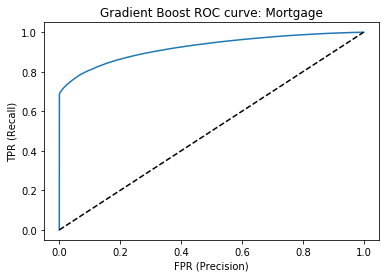

Area under curve (AUC):  0.9227890539843395


In [0]:
y_score1 = gb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score1)

title('Gradient Boost ROC curve: Mortgage')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
#print 'Area under curve (AUC): ', auc(fpr,tpr)
print('Area under curve (AUC): ', auc(fpr,tpr))

## Baseline Analysis

In [0]:
import itertools
import numpy as np
import scipy
from themis_ml import *
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

from sklearn.metrics import (accuracy_score, roc_auc_score, f1_score)

#from .checks import check_binary
from math import sqrt
from scipy.stats import t

In [0]:
#from themis_ml import datasets
#from themis_ml.datasets.german_credit_data_map import preprocess_german_credit_data
from themis_ml.metrics import mean_difference, normalized_mean_difference, \
    mean_confidence_interval

#### Targeted Variable: ACTION (y)

1 = approved
0 = denied

In [0]:
subset_data.y.value_counts()

1    2361397
0     664921
Name: y, dtype: int64

#### Protected Class: sex

advantaged group: male
disadvantaged group: female

In [0]:
subset_data.female.value_counts()

0    2103584
1     922734
Name: female, dtype: int64

advantaged group: Not Latino/Hispanic   disadvantaged group: Latino/Hispanic

In [0]:
def report_metric(metric, mean_diff, lower, upper):
    print("{metric}: {md:0.02f} - 95% CI [{lower:0.02f}, {upper:0.02f}]"
          .format(metric=metric, md=mean_diff, lower=lower, upper=upper))

report_metric(
    "mean difference",
    *map(lambda x: x * 100, mean_difference(subset_data.y, subset_data.female)))
report_metric(
    
    "normalized mean difference",
    *map(lambda x: x * 100, normalized_mean_difference(subset_data.y, subset_data.female)))

report_metric(
    "mean difference",
    *map(lambda x: x * 100, mean_difference(subset_data.y, subset_data.latino)))
report_metric(
    
    "normalized mean difference",
    *map(lambda x: x * 100, normalized_mean_difference(subset_data.y, subset_data.latino)))

report_metric(
    "mean difference",
    *map(lambda x: x * 100, mean_difference(subset_data.y, subset_data.AA)))
report_metric(
    
    "normalized mean difference",
    *map(lambda x: x * 100, normalized_mean_difference(subset_data.y, subset_data.AA)))

mean difference: 3.84 - 95% CI [3.74, 3.94]
normalized mean difference: 5.33 - 95% CI [5.23, 5.43]
mean difference: 7.08 - 95% CI [6.93, 7.23]
normalized mean difference: 8.11 - 95% CI [7.96, 8.26]
mean difference: 18.19 - 95% CI [18.02, 18.37]
normalized mean difference: 21.51 - 95% CI [21.34, 21.68]


These mean differences and confidence interval bounds suggest that on average:

Men are more likely to be approved at a 3.96% higher rate than women, with a lower bound of 3.85% and upper bound of 4.06%.

### Establish Baseline Metrics

In [0]:
subset_data.columns

Index(['YEAR', 'AGENCY', 'AMNT', 'STATE', 'APP_INCCH', 'APP_INC', 'HOEPA', 'POPCH', 'POP', 'MINPOPCH', 'MINPOP', 'MED_INCCH', 'MED_INC', 'TCT2MSACH', 'TCT2MSA', 'OWNOCCCH', 'OWNOCC', 'OWNOCC4CH', 'OWNOCC4', 'y', 'LOAN_TYPE_FHA-insured', 'LOAN_TYPE_FSA/RHS', 'LOAN_TYPE_VA-guaranteed', 'LOAN_TYPE_conventional', 'PROP_TYPE_1-4 family', 'PROP_TYPE_manufactured housing', 'PURPOSE_home improvement', 'PURPOSE_home purchase', 'PURPOSE_refinancing', 'PURCHTYPE_0', 'PURCHTYPE_1', 'PURCHTYPE_2', 'PURCHTYPE_3', 'PURCHTYPE_4', 'PURCHTYPE_5', 'PURCHTYPE_6', 'PURCHTYPE_7', 'PURCHTYPE_8', 'PURCHTYPE_9', 'OCCUPANCY_1', 'OCCUPANCY_2', 'OCCUPANCY_3', 'PRE_APP_Approved', 'PRE_APP_not applicable', 'PRE_APP_not approved', 'COAPP_ETH_Not hispanic/latino', 'COAPP_ETH_hispanic/latino', 'COAPP_ETH_info not provided', 'COAP_RACE1_American Indian', 'COAP_RACE1_Asian', 'COAP_RACE1_Black', 'COAP_RACE1_Pacific Islander', 'COAP_RACE1_no coapplicant', 'COAP_RACE1_not applicable', 'COAP_RACE1_not provided',
       'COA

In [0]:
subset_data.STATE.value_counts()

6.0     400296
48.0    254838
12.0    210724
17.0    122944
42.0    120075
36.0    108482
39.0    100455
26.0     93380
37.0     92140
13.0     90545
51.0     88442
4.0      82334
53.0     82002
34.0     79806
8.0      79264
25.0     72136
47.0     64421
24.0     64155
18.0     61787
27.0     54043
29.0     53206
55.0     51833
45.0     50564
1.0      45116
22.0     43763
41.0     41414
49.0     37340
40.0     32772
9.0      32065
32.0     31389
21.0     31102
19.0     26698
20.0     22669
5.0      22283
72.0     20835
16.0     16549
31.0     15874
35.0     15209
28.0     14348
54.0     12251
10.0     11219
23.0     10555
44.0     10473
33.0     10347
15.0      9558
11.0      7209
2.0       5953
46.0      5757
38.0      5013
30.0      4744
56.0      3083
50.0      2858
Name: STATE, dtype: int64

In [0]:
feature_set_1 = ['YEAR', 'AGENCY', 'AMNT', 'STATE', 'APP_INCCH',\
                 'HOEPA', 'POPCH', 'MINPOPCH', 'MED_INCCH','female',\
                 'TCT2MSACH', 'OWNOCCCH', 'latino', \
                 'OWNOCC4CH', 'LOAN_TYPE_FHA-insured', \
                 'LOAN_TYPE_FSA/RHS', 'LOAN_TYPE_VA-guaranteed', 'LOAN_TYPE_conventional', \
                 'PROP_TYPE_1-4 family', 'PROP_TYPE_manufactured housing', \
                 'PURPOSE_home improvement', 'PURPOSE_home purchase', \
                 'PURPOSE_refinancing', 'PURCHTYPE_0', 'PURCHTYPE_1', 'PURCHTYPE_2', \
                 'PURCHTYPE_3', 'PURCHTYPE_4', 'PURCHTYPE_5', 'PURCHTYPE_6', \
                 'PURCHTYPE_7', 'PURCHTYPE_8', 'PURCHTYPE_9', 'OCCUPANCY_1', \
                 'OCCUPANCY_2', 'OCCUPANCY_3', 'PRE_APP_Approved', \
                 'PRE_APP_not applicable', 'PRE_APP_not approved', \
                 'COAPP_ETH_Not hispanic/latino',\
                 'COAPP_ETH_hispanic/latino', 'COAPP_ETH_info not provided',\
                 'APP_RACE1_American Indian', 'APP_RACE1_Asian', 'APP_RACE1_Black', \
                 'APP_RACE1_Pacific Islander','APP_RACE1_white', \
                 'COAP_RACE1_American Indian', 'COAP_RACE1_Asian', \
                 'COAP_RACE1_Black', 'COAP_RACE1_Pacific Islander',\
                 'COAP_RACE1_no coapplicant', 'COAP_RACE1_not applicable',\
                 'COAP_RACE1_not provided', 'COAP_RACE1_white', 'LIENSTATUS_first_lien', \
                 'LIENSTATUS_not_secured', 'LIENSTATUS_subordinate_lien', 'Pre_2004']

In [0]:
# specify feature set. Note that we're excluding the female columns that we created above.
feature_set_female = ['YEAR', 'AGENCY', 'AMNT', 'STATE', 'APP_INCCH',\
                 'HOEPA', 'POPCH', 'MINPOPCH', 'MED_INCCH',\
                 'TCT2MSACH', 'OWNOCCCH', 'latino', \
                 'OWNOCC4CH', 'LOAN_TYPE_FHA-insured', \
                 'LOAN_TYPE_FSA/RHS', 'LOAN_TYPE_VA-guaranteed', 'LOAN_TYPE_conventional', \
                 'PROP_TYPE_1-4 family', 'PROP_TYPE_manufactured housing', \
                 'PURPOSE_home improvement', 'PURPOSE_home purchase', \
                 'PURPOSE_refinancing', 'PURCHTYPE_0', 'PURCHTYPE_1', 'PURCHTYPE_2', \
                 'PURCHTYPE_3', 'PURCHTYPE_4', 'PURCHTYPE_5', 'PURCHTYPE_6', \
                 'PURCHTYPE_7', 'PURCHTYPE_8', 'PURCHTYPE_9', 'OCCUPANCY_1', \
                 'OCCUPANCY_2', 'OCCUPANCY_3', 'PRE_APP_Approved', \
                 'PRE_APP_not applicable', 'PRE_APP_not approved', \
                 'COAPP_ETH_Not hispanic/latino',\
                 'COAPP_ETH_hispanic/latino', 'COAPP_ETH_info not provided',\
                 'APP_RACE1_American Indian', 'APP_RACE1_Asian', 'APP_RACE1_Black', \
                 'APP_RACE1_Pacific Islander','APP_RACE1_white', \
                 'COAP_RACE1_American Indian', 'COAP_RACE1_Asian', \
                 'COAP_RACE1_Black', 'COAP_RACE1_Pacific Islander',\
                 'COAP_RACE1_no coapplicant', 'COAP_RACE1_not applicable',\
                 'COAP_RACE1_not provided', 'COAP_RACE1_white', 'LIENSTATUS_first_lien', \
                 'LIENSTATUS_not_secured', 'LIENSTATUS_subordinate_lien', 'Pre_2004']

In [0]:
feature_set_latino = ['YEAR', 'AGENCY', 'AMNT', 'STATE', 'APP_INCCH',\
                 'HOEPA', 'POPCH', 'MINPOPCH', 'MED_INCCH',\
                 'TCT2MSACH', 'OWNOCCCH', \
                 'OWNOCC4CH', 'LOAN_TYPE_FHA-insured', 'female', \
                 'LOAN_TYPE_FSA/RHS', 'LOAN_TYPE_VA-guaranteed', 'LOAN_TYPE_conventional', \
                 'PROP_TYPE_1-4 family', 'PROP_TYPE_manufactured housing', \
                 'PURPOSE_home improvement', 'PURPOSE_home purchase', \
                 'PURPOSE_refinancing', 'PURCHTYPE_0', 'PURCHTYPE_1', 'PURCHTYPE_2', \
                 'PURCHTYPE_3', 'PURCHTYPE_4', 'PURCHTYPE_5', 'PURCHTYPE_6', \
                 'PURCHTYPE_7', 'PURCHTYPE_8', 'PURCHTYPE_9', 'OCCUPANCY_1', \
                 'OCCUPANCY_2', 'OCCUPANCY_3', 'PRE_APP_Approved', \
                 'PRE_APP_not applicable', 'PRE_APP_not approved','COAPP_ETH_Not hispanic/latino',\
                 'COAPP_ETH_hispanic/latino', 'COAPP_ETH_info not provided',\
                 'APP_RACE1_American Indian', 'APP_RACE1_Asian', 'APP_RACE1_Black', \
                 'APP_RACE1_Pacific Islander','APP_RACE1_white', \
                 'COAP_RACE1_American Indian', 'COAP_RACE1_Asian', \
                 'COAP_RACE1_Black', 'COAP_RACE1_Pacific Islander',\
                 'COAP_RACE1_no coapplicant', 'COAP_RACE1_not applicable',\
                 'COAP_RACE1_not provided', 'COAP_RACE1_white', 'LIENSTATUS_first_lien', \
                 'LIENSTATUS_not_secured', 'LIENSTATUS_subordinate_lien', 'Pre_2004']

In [0]:
feature_set_AA = ['YEAR', 'AGENCY', 'AMNT', 'STATE', 'APP_INCCH',\
                 'HOEPA', 'POPCH', 'MINPOPCH', 'MED_INCCH',\
                 'TCT2MSACH', 'OWNOCCCH', \
                 'OWNOCC4CH', 'LOAN_TYPE_FHA-insured', 'female',\
                 'LOAN_TYPE_FSA/RHS', 'LOAN_TYPE_VA-guaranteed', 'LOAN_TYPE_conventional', \
                 'PROP_TYPE_1-4 family', 'PROP_TYPE_manufactured housing', \
                 'PURPOSE_home improvement', 'PURPOSE_home purchase', \
                 'PURPOSE_refinancing', 'PURCHTYPE_0', 'PURCHTYPE_1', 'PURCHTYPE_2', \
                 'PURCHTYPE_3', 'PURCHTYPE_4', 'PURCHTYPE_5', 'PURCHTYPE_6', \
                 'PURCHTYPE_7', 'PURCHTYPE_8', 'PURCHTYPE_9', 'OCCUPANCY_1', \
                 'OCCUPANCY_2', 'OCCUPANCY_3', 'PRE_APP_Approved', \
                 'PRE_APP_not applicable', 'PRE_APP_not approved', \
                 'COAPP_ETH_Not hispanic/latino',\
                 'COAPP_ETH_hispanic/latino', 'COAPP_ETH_info not provided',\
                 'COAP_RACE1_American Indian', 'COAP_RACE1_Asian', \
                 'COAP_RACE1_Black', 'COAP_RACE1_Pacific Islander',\
                 'COAP_RACE1_no coapplicant', 'COAP_RACE1_not applicable',\
                 'COAP_RACE1_not provided', 'COAP_RACE1_white', 'LIENSTATUS_first_lien', \
                 'LIENSTATUS_not_secured', 'LIENSTATUS_subordinate_lien', 'Pre_2004']

In [0]:
N_SPLITS = 2
N_REPEATS = 2
RANDOM_STATE = 1

def get_estimator_name(e):
    return "".join([x for x in str(type(e)).split(".")[-1]
                    if x.isalpha()])


def get_grid_params(grid_params_dict):
    """Get outer product of grid search parameters."""
    return [
        dict(params) for params in itertools.product(
            *[[(k, v_i) for v_i in v] for
              k, v in grid_params_dict.items()])]


def fit_with_s(estimator):
    has_relabeller = getattr(estimator, "relabeller", None) is not None
    child_estimator = getattr(estimator, "estimator", None)
    estimator_fit_with_s = getattr(estimator, "S_ON_FIT", False)
    child_estimator_fit_with_s = getattr(child_estimator, "S_ON_FIT", False)
    return has_relabeller or estimator_fit_with_s or\
        child_estimator_fit_with_s
    
    
def predict_with_s(estimator):
    estimator_pred_with_s = getattr(estimator, "S_ON_PREDICT", False)
    child_estimator = getattr(estimator, "estimator", None)
    return estimator_pred_with_s or \
        getattr(child_estimator, "S_ON_PREDICT", False)

def cross_validation_experiment(estimators, X, y, s, s_name, verbose=True):
    msg = "Training models: protected_class = %s" % s_name
    if verbose:
        print(msg)
        print("-" * len(msg))
    performance_scores = []
    # stratified groups tries to balance out y and s
    groups = [i + j for i, j in
              zip(y.astype(str), s_female.astype(str))]
    cv = RepeatedStratifiedKFold(
        n_splits=N_SPLITS,
        n_repeats=N_REPEATS,
        random_state=RANDOM_STATE)
    for e_name, e in estimators:
        if verbose:
            print("%s, fold:" % e_name),
        for i, (train, test) in enumerate(cv.split(X, y, groups=groups)):
            if verbose:
                print(i),
            # create train and validation fold partitions
            X_train, X_test = X[train], X[test]
            y_train, y_test = y[train], y[test]
            s_train, s_test = s[train], s[test]

            # fit model and generate train and test predictions
            if fit_with_s(e):
                e.fit(X_train, y_train, s_train)
            else:
                e.fit(X_train, y_train)
                
            train_pred_args = (X_train, s_train) if predict_with_s(e) \
                else (X_train, )
            test_pred_args = (X_test, s_test) if predict_with_s(e) \
                else (X_test, )
                
            train_pred_prob = e.predict_proba(*train_pred_args)[:, 1]
            train_pred = e.predict(*train_pred_args)
            test_pred_prob = e.predict_proba(*test_pred_args)[:, 1]
            test_pred = e.predict(*test_pred_args)

            # train scores
            performance_scores.append([
                s_name, e_name, i, "train",
                # regular metrics
                roc_auc_score(y_train, train_pred_prob),

                # fairness metrics
                mean_difference(train_pred, s_train)[0],
            ])
            # test scores
            performance_scores.append([
                s_name, e_name, i, "test",
                # regular metrics
                roc_auc_score(y_test, test_pred_prob),
                # fairness metrics
                mean_difference(test_pred, s_test)[0]
            ])
        if verbose:
            print("")
    if verbose:
        print("")
    return pd.DataFrame(
        performance_scores,
        columns=[
            "protected_class", "estimator", "cv_fold", "fold_type",
            "auc", "mean_diff"])
            
# training and target data
X = subset_data[feature_set_1].values
y = subset_data["y"].values
s_female = subset_data["female"].values
s_latino = subset_data['latino'].values
s_AA = subset_data['AA'].values


LOGISTIC_REGRESSION = LogisticRegression(
    penalty="l2", C=0.001, class_weight="balanced")
DECISION_TREE_CLF = DecisionTreeClassifier(
    criterion="entropy", max_depth=10, min_samples_leaf=10, max_features=10,
    class_weight="balanced")
RANDOM_FOREST_CLF = RandomForestClassifier(
    criterion="entropy", n_estimators=50, max_depth=10, max_features=10,
    min_samples_leaf=10, class_weight="balanced")
estimators = [
    ("LogisticRegression", LOGISTIC_REGRESSION),
    ("DecisionTree", DECISION_TREE_CLF),
    ("RandomForest", RANDOM_FOREST_CLF)
]
experiment_baseline_female = cross_validation_experiment(
    estimators, X, y, s_female, "female")
experiment_baseline_latino = cross_validation_experiment(
    estimators, X, y, s_latino, "latino")
experiment_baseline_AA = cross_validation_experiment(
    estimators, X, y, s_AA, "AA")


Training models: protected_class = female
-----------------------------------------
LogisticRegression, fold:
0
1
2
3

DecisionTree, fold:
0
1
2
3

RandomForest, fold:
0
1
2
3


Training models: protected_class = latino
-----------------------------------------
LogisticRegression, fold:
0
1
2
3

DecisionTree, fold:
0
1
2
3

RandomForest, fold:
0
1
2
3


Training models: protected_class = AA
-------------------------------------
LogisticRegression, fold:
0
1
2
3

DecisionTree, fold:
0
1
2
3

RandomForest, fold:
0
1
2
3




In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


UTILITY_METRICS = ["auc"]
FAIRNESS_METRICS = ["mean_diff"]

def summarize_experiment_results(experiment_df):
    return (
        experiment_df
        .drop("cv_fold", axis=1)
        .groupby(["protected_class", "estimator", "fold_type"])
        .mean())

experiment_baseline = pd.concat([
    experiment_baseline_female,
    experiment_baseline_latino,
    experiment_baseline_AA
])

experiment_baseline_summary = summarize_experiment_results(
    experiment_baseline)
experiment_baseline_summary.query("fold_type == 'test'")

auc  mean_diff
protected_class estimator          fold_type                     
AA              DecisionTree       test       0.900392   0.165092
                LogisticRegression test       0.911332   0.168219
                RandomForest       test       0.922613   0.159000
female          DecisionTree       test       0.899940   0.049274
                LogisticRegression test       0.911355   0.051091
                RandomForest       test       0.923215   0.048212
latino          DecisionTree       test       0.915008   0.049887
                LogisticRegression test       0.911278   0.054606
                RandomForest       test       0.923567   0.051570

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


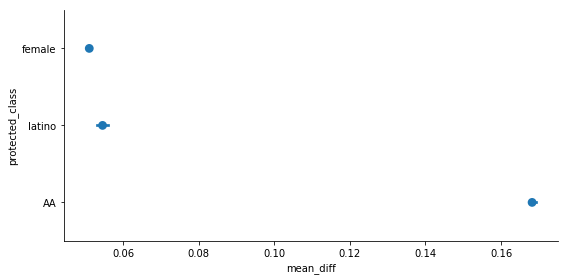

In [0]:
baseline_df = (
    experiment_baseline
    .query("fold_type == 'test' and estimator == 'LogisticRegression'")
)
sns.factorplot(y="protected_class", x="mean_diff", orient="h", data=baseline_df,
               size=4, aspect=2, join=False)

In [0]:
protected_classes = ["female",'latino','AA']
for s in protected_classes:
    mean_ci = mean_confidence_interval(
        plot_df.query("protected_class == @s").mean_diff.dropna())
    print(
        "grand_mean(mean_diff) for %s - mean: %0.03f, 95%% CI(%0.03f, %0.03f)" %
        (s, mean_ci[0], mean_ci[1], mean_ci[2]))

NameError: name 'plot_df' is not defined

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


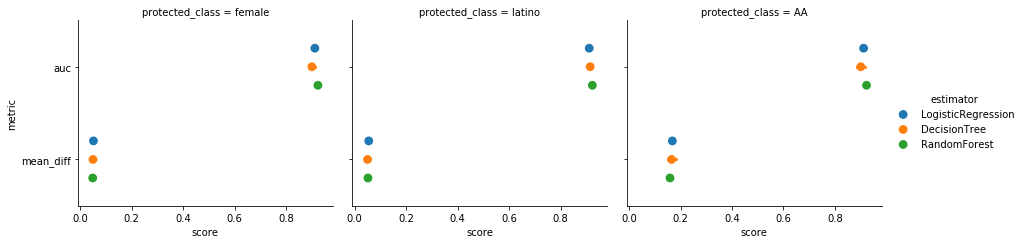

In [0]:
def plot_experiment_results(experiment_results):
    return (
        experiment_results
        .query("fold_type == 'test'")
        .drop(["fold_type", "cv_fold"], axis=1)
        .pipe(pd.melt, id_vars=["protected_class", "estimator"],
              var_name="metric", value_name="score")
        .pipe((sns.factorplot, "data"), y="metric",
              x="score", hue="estimator", col="protected_class", col_wrap=3,
              size=3.5, aspect=1.2, join=False, dodge=0.4))


plot_experiment_results(experiment_baseline);

In [0]:
from IPython.display import Markdown, display

def print_best_metrics(experiment_results, protected_classes):
    for pclass in protected_classes:
        msg = "#### protected class = %s:" % pclass
        display(Markdown(msg))
        exp_df = experiment_results[
            (experiment_results["protected_class"] == pclass) &
            (experiment_results["fold_type"] == "test")]
        msg = ""
        
        for m in UTILITY_METRICS: g
            utility_msg = \
                "- best utility measured by %s (higher is better)" % m
            best_model = (
                exp_df
                .sort_values(m, ascending=False)
                .drop(["fold_type"], axis=1)
                .iloc[0][[m, "estimator"]])
            msg += utility_msg + " = %0.03f: %s\n" % \
                   (best_model[0], best_model[1])
        
        for m in FAIRNESS_METRICS:
            fairness_msg = \
                "- best fairness measured by %s (lower is better)" % m
            best_model = (
                exp_df
                # score closer to zero is better
                .assign(abs_measure=lambda df: df[m].abs())
                .sort_values("abs_measure")
                .drop(["abs_measure", "fold_type"], axis=1)
                .iloc[0][[m, "estimator"]])
            msg += fairness_msg + " = %0.03f: %s\n" % \
                   (best_model[0], best_model[1])
        display(Markdown(msg))
        
print_best_metrics(
    experiment_baseline_summary.reset_index(),
    ["female"])#,"foreign_worker", "age_below_25"])

#### protected class = female:

- best utility measured by auc (higher is better) = 0.923: RandomForest
- best fairness measured by mean_diff (lower is better) = 0.048: RandomForest


## Adjusting bias with Naive

In [0]:
X_no_sex = subset_data[feature_set_female].values

In [0]:
X_no_eth = subset_data[feature_set_latino].values

In [0]:
X_no_race = subset_data[feature_set_AA].values

In [0]:
experiment_naive_female = cross_validation_experiment(
    estimators, X_no_sex, y, s_female, "female")
experiment_naive_latino = cross_validation_experiment(
    estimators, X_no_eth, y, s_latino, "latino")
experiment_naive_AA = cross_validation_experiment(
    estimators, X_no_race, y, s_AA, "AA")

Training models: protected_class = female
-----------------------------------------
LogisticRegression, fold:
0
1
2
3

DecisionTree, fold:
0
1
2
3

RandomForest, fold:
0
1
2
3


Training models: protected_class = latino
-----------------------------------------
LogisticRegression, fold:
0
1
2
3

DecisionTree, fold:
0
1
2
3

RandomForest, fold:
0
1
2
3


Training models: protected_class = AA
-------------------------------------
LogisticRegression, fold:
0
1
2
3

DecisionTree, fold:
0
1
2
3

RandomForest, fold:
0
1
2
3




In [0]:
experiment_naive = pd.concat([
    experiment_naive_female,
    experiment_naive_latino,
    experiment_naive_AA
])
experiment_naive_summary = summarize_experiment_results(experiment_naive)
experiment_naive_summary.query("fold_type == 'test'")

auc  mean_diff
protected_class estimator          fold_type                     
AA              DecisionTree       test       0.916538   0.171972
                LogisticRegression test       0.910502   0.163203
                RandomForest       test       0.923216   0.162127
female          DecisionTree       test       0.913253   0.043183
                LogisticRegression test       0.911261   0.047133
                RandomForest       test       0.922903   0.046643
latino          DecisionTree       test       0.916234   0.058573
                LogisticRegression test       0.911021   0.048864
                RandomForest       test       0.922999   0.048176

## Adjusting bias with Relabeling

In [0]:
from themis_ml.preprocessing.relabelling import Relabeller
from themis_ml.meta_estimators import FairnessAwareMetaEstimator

In [0]:
relabeller = Relabeller()
relabelling_estimators = [
    (name, FairnessAwareMetaEstimator(e, relabeller=relabeller))
    for name, e in estimators]

In [0]:
experiment_relabel_female = cross_validation_experiment(
    relabelling_estimators, X_no_sex, y, s_female, "female")
experiment_relabel_latino = cross_validation_experiment(
    relabelling_estimators, X_no_eth, y, s_latino, "latino")
experiment_relabel_AA = cross_validation_experiment(
    relabelling_estimators, X_no_race, y, s_AA, "AA")

Training models: protected_class = female
-----------------------------------------
LogisticRegression, fold:
0
1
2
3

DecisionTree, fold:
0
1
2
3

RandomForest, fold:
0
1
2
3


Training models: protected_class = latino
-----------------------------------------
LogisticRegression, fold:
0
1
2
3

DecisionTree, fold:
0
1
2
3

RandomForest, fold:
0
1
2
3


Training models: protected_class = AA
-------------------------------------
LogisticRegression, fold:
0
1
2
3

DecisionTree, fold:
0
1
2
3

RandomForest, fold:
0
1
2
3




In [0]:
experiment_relabel = pd.concat([
    experiment_relabel_female,
    experiment_relabel_latino,
    experiment_relabel_AA
])


In [0]:
experiment_relabel_summary = summarize_experiment_results(experiment_relabel)

Appears that logistic regression results improved with the relabeling method.

In [0]:
experiment_relabel_summary.query("fold_type == 'test'")

auc  mean_diff
protected_class estimator          fold_type                     
AA              DecisionTree       test       0.904845   0.179842
                LogisticRegression test       0.902226   0.160563
                RandomForest       test       0.917298   0.167786
female          DecisionTree       test       0.895030   0.048054
                LogisticRegression test       0.906773   0.053834
                RandomForest       test       0.920749   0.051079
latino          DecisionTree       test       0.902684   0.039637
                LogisticRegression test       0.907567   0.049208
                RandomForest       test       0.921143   0.043766

In [0]:
experiment_baseline_summary.query("fold_type == 'test'")

auc  mean_diff
protected_class estimator          fold_type                     
AA              DecisionTree       test       0.900392   0.165092
                LogisticRegression test       0.911332   0.168219
                RandomForest       test       0.922613   0.159000
female          DecisionTree       test       0.899940   0.049274
                LogisticRegression test       0.911355   0.051091
                RandomForest       test       0.923215   0.048212
latino          DecisionTree       test       0.915008   0.049887
                LogisticRegression test       0.911278   0.054606
                RandomForest       test       0.923567   0.051570

## ACF

In [0]:
from themis_ml.linear_model.counterfactually_fair_models import \
    LinearACFClassifier

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [0]:
LINEAR_REG = LinearRegression()
DECISION_TREE_REG = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)
RANDOM_FOREST_REG = RandomForestRegressor(
    n_estimators=50, max_depth=5, min_samples_leaf=10)


In [0]:
linear_acf_estimators = [
    (name, LinearACFClassifier(
         target_estimator=e,
         binary_residual_type="absolute"))
    for name, e in estimators]

experiment_acf_female = cross_validation_experiment(
    linear_acf_estimators, X_no_sex, y, s_female, "female")
experiment_acf_latino = cross_validation_experiment(
    linear_acf_estimators, X_no_eth, y, s_latino, "latino")
experiment_acf_AA = cross_validation_experiment(
    linear_acf_estimators, X_no_race, y, s_AA, "AA")

Training models: protected_class = female
-----------------------------------------
LogisticRegression, fold:
0
1
2
3

DecisionTree, fold:
0
1
2
3

RandomForest, fold:
0
1
2
3


Training models: protected_class = latino
-----------------------------------------
LogisticRegression, fold:
0
1
2
3

DecisionTree, fold:
0
1
2
3

RandomForest, fold:
0
1
2
3


Training models: protected_class = AA
-------------------------------------
LogisticRegression, fold:
0
1
2
3

DecisionTree, fold:
0
1
2
3

RandomForest, fold:
0
1
2
3




In [0]:
experiment_acf = pd.concat([
    experiment_acf_female,
    experiment_acf_latino,
    experiment_acf_AA
])

In [0]:
experiment_acf_summary = summarize_experiment_results(experiment_acf)
experiment_acf_summary.query("fold_type == 'test'")

auc  mean_diff
protected_class estimator          fold_type                     
AA              DecisionTree       test       0.904121   0.264452
                LogisticRegression test       0.899108   0.059753
                RandomForest       test       0.922935   0.171093
female          DecisionTree       test       0.913401   0.049725
                LogisticRegression test       0.909686   0.018292
                RandomForest       test       0.922260   0.053658
latino          DecisionTree       test       0.903734   0.069595
                LogisticRegression test       0.908642   0.017010
                RandomForest       test       0.922860   0.058698

In [0]:
from themis_ml.postprocessing.reject_option_classification import \
    SingleROClassifier

In [0]:
single_roc_clf_estimators = [
    (name, SingleROClassifier(estimator=e))
    for name, e in estimators]

experiment_single_roc_female = cross_validation_experiment(
    single_roc_clf_estimators, X_no_sex, y, s_female, "female")
experiment_single_roc_latino = cross_validation_experiment(
    single_roc_clf_estimators, X_no_eth, y, s_latino, "latino")
experiment_single_roc_AA = cross_validation_experiment(
    single_roc_clf_estimators, X_no_race, y, s_AA, "AA")

Training models: protected_class = female
-----------------------------------------
LogisticRegression, fold:
0
1
2
3

DecisionTree, fold:
0
1
2
3

RandomForest, fold:
0
1
2
3


Training models: protected_class = latino
-----------------------------------------
LogisticRegression, fold:
0
1
2
3

DecisionTree, fold:
0
1
2
3

RandomForest, fold:
0
1
2
3


Training models: protected_class = AA
-------------------------------------
LogisticRegression, fold:
0
1
2
3

DecisionTree, fold:
0
1
2
3

RandomForest, fold:
0
1
2
3




In [0]:
experiment_roc = pd.concat([
    experiment_single_roc_female,
    experiment_single_roc_latino,
    experiment_single_roc_AA
])

In [0]:
experiment_single_roc_summary = summarize_experiment_results(
    experiment_roc)
experiment_single_roc_summary.query("fold_type == 'test'")

auc  mean_diff
protected_class estimator          fold_type                     
AA              DecisionTree       test       0.894556   0.162092
                LogisticRegression test       0.909948   0.176789
                RandomForest       test       0.921601   0.166284
female          DecisionTree       test       0.908898   0.038309
                LogisticRegression test       0.910592   0.049127
                RandomForest       test       0.921367   0.040295
latino          DecisionTree       test       0.909536   0.064265
                LogisticRegression test       0.910312   0.059445
                RandomForest       test       0.921832   0.051790

## Comparisons

In [1]:
compare_experiments = (
    pd.concat([
        experiment_baseline.assign(experiment="B"),
        experiment_naive.assign(experiment="RPA"),
        experiment_relabel.assign(experiment="RTV"),
        experiment_acf.assign(experiment="CFM"),
        experiment_roc.assign(experiment="ROC")
    ])
    .assign(
        protected_class=lambda df: df.protected_class.str.replace("_", " "),
    )
)
compare_experiments

NameError: ignored

In [0]:
LOGREG_L2_PARAM = [
    3, 1, 3e-1, 1e-1, 3e-2, 1e-2, 3e-3, 1e-3,
    3e-4, 1e-4, 3e-5, 1e-5, 3e-6, 1e-6, 3e-7, 1e-7, 3e-8, 1e-8]

def validation_curve_experiment(
        estimator_name, estimator, param_name, param_list, update_func):
    validaton_curve_experiment = []
    for param in param_list:
        e = clone(estimator)
        e = update_func(e, param_name, param)
        estimators = [(estimator_name, e)]
        experiment_relabel_female = cross_validation_experiment(
            estimators, X_no_sex, y, s_female, "female",
            verbose=False)
        experiment_relabel_latino = cross_validation_experiment(
            estimators, X_no_eth, y, s_latino, "latino",
            verbose=False)
        experiment_relabel_AA = cross_validation_experiment(
            estimators, X_no_race, y, s_AA, "AA",
            verbose=False)
        validaton_curve_experiment.extend(
            [experiment_relabel_female.assign(**{param_name: param}),
             experiment_relabel_latino.assign(**{param_name: param}),
             experiment_relabel_AA.assign(**{param_name: param})])
    return pd.concat(validaton_curve_experiment)


def update_relabeller(e, param_name, param):
    e = clone(e)
    child_estimator = clone(e.estimator)
    child_estimator.set_params(**{param_name: param})
    e.set_params(estimator=child_estimator)
    return e
        

relabel_validaton_curve_experiment = validation_curve_experiment(
    "LogisticRegression", FairnessAwareMetaEstimator(
        LOGISTIC_REGRESSION, relabeller=Relabeller()),
    "C", LOGREG_L2_PARAM, update_relabeller)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


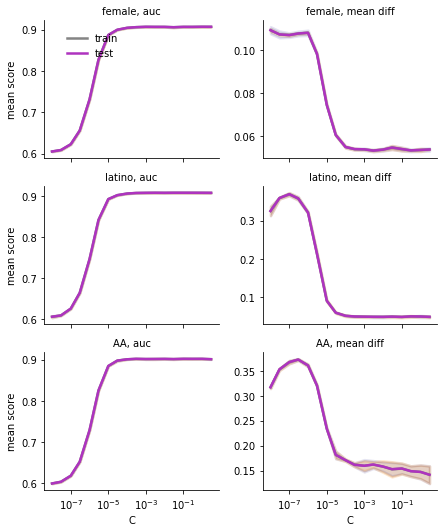

In [0]:
def validation_curve_plot(x, y, **kwargs):
    ax = plt.gca()
    lw = 2.5
    data = kwargs.pop("data")
    train_data = data.query("fold_type == 'train'")
    test_data = data.query("fold_type == 'test'")
    grp_data_train = train_data.groupby(x)
    grp_data_test = test_data.groupby(x)
    mean_data_train = grp_data_train[y].mean()
    mean_data_test = grp_data_test[y].mean()
    std_data_train = grp_data_train[y].std()
    std_data_test = grp_data_test[y].std()
    ax.semilogx(mean_data_train.index, mean_data_train,
                label="train", color="#848484", lw=lw)
    ax.semilogx(mean_data_test.index, mean_data_test,
                label="test", color="#ae33bf", lw=lw)
    # # Add error region
    ax.fill_between(mean_data_train.index, mean_data_train - std_data_train,
                    mean_data_train + std_data_train, alpha=0.2,
                    color="darkorange", lw=lw)
    ax.fill_between(mean_data_test.index, mean_data_test - std_data_test,
                    mean_data_test + std_data_test, alpha=0.1,
                    color="navy", lw=lw)

relabel_validaton_curve_experiment_df = (
    relabel_validaton_curve_experiment
    .pipe(pd.melt,
          id_vars=["protected_class", "estimator", "cv_fold", "fold_type",
                   "C"],
          value_vars=["auc", "mean_diff"],
          var_name="metric", value_name="score")
    .assign(
        protected_class=lambda df: df.protected_class.str.replace("_", " "),
        metric=lambda df: df.metric.str.replace("_", " "))
    .rename(columns={"score": "mean score"})
)

# relabel_validaton_curve_experiment_df
g = sns.FacetGrid(
    relabel_validaton_curve_experiment_df,
    row="protected_class",
    col="metric", size=2.5, aspect=1.1, sharey=False,
    margin_titles=False)
g = g.map_dataframe(validation_curve_plot, "C", "mean score")
g.set_titles(template="{row_name}, {col_name}")
# g.add_legend()
# g.add_legend(bbox_to_anchor=(0.275, 0.91))
g.add_legend(bbox_to_anchor=(0.28, 0.9))
g.fig.tight_layout()

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update y

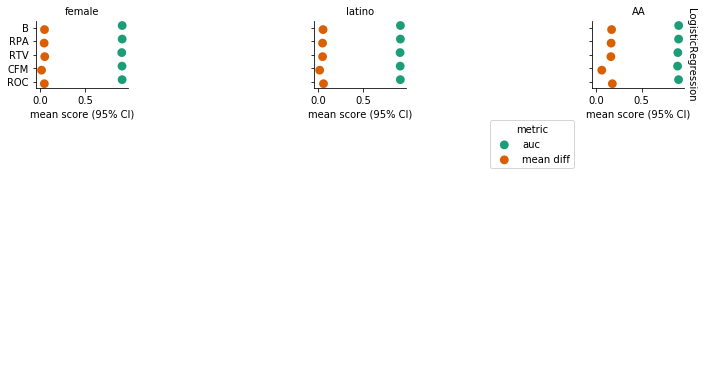

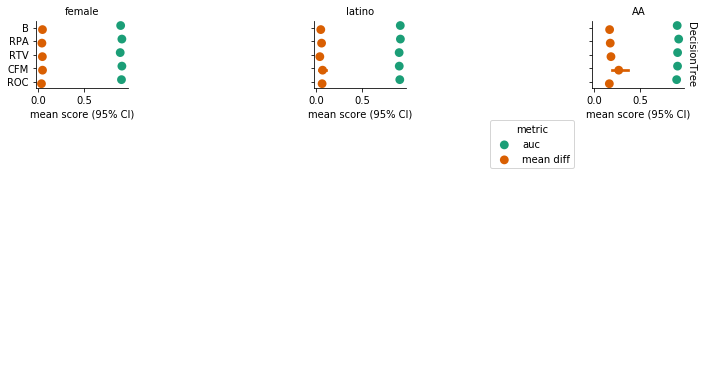

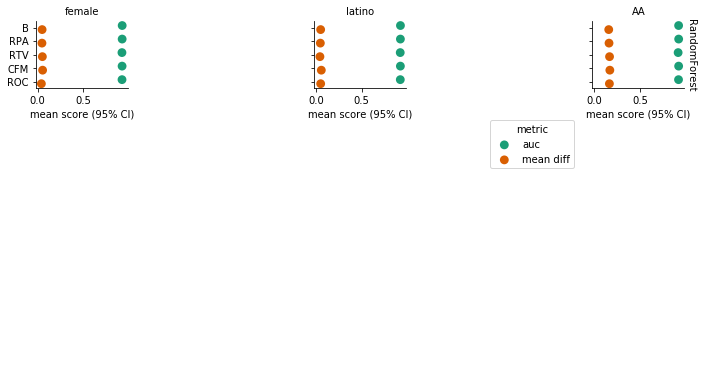

In [0]:
comparison_palette = sns.color_palette("Dark2", n_colors=8)

def compare_experiment_results_multiple_model(experiment_results):
    g = (
        experiment_results
        .query("fold_type == 'test'")
        .drop(["cv_fold"], axis=1)
        .pipe(pd.melt, id_vars=["experiment", "protected_class", "estimator",
                                "fold_type"],
              var_name="metric", value_name="score")
        .assign(
            metric=lambda df: df.metric.str.replace("_", " "))
        .pipe((sns.factorplot, "data"), y="experiment",
              x="score", hue="metric",
              col="protected_class", row="estimator",
              join=False, size=3, aspect=1.1, dodge=0.3,
              palette=comparison_palette, margin_titles=True, legend=False))
    g.set_axis_labels("mean score (95% CI)")
    for ax in g.axes.ravel():
        ax.set_ylabel("")
        plt.setp(ax.texts, text="")
    g.set_titles(row_template="{row_name}", col_template="{col_name}")
    plt.legend(title="metric", loc=9, bbox_to_anchor=(-0.65, -0.4))
    g.fig.legend(loc=9, bbox_to_anchor=(0.5, -0.3))
    g.fig.tight_layout()

compare_experiment_results_multiple_model(
    compare_experiments.query("estimator == 'LogisticRegression'"))
compare_experiment_results_multiple_model(
    compare_experiments.query("estimator == 'DecisionTree'"))
compare_experiment_results_multiple_model(
    compare_experiments.query("estimator == 'RandomForest'"));

In [0]:
from scipy import stats

def compute_corr_pearson(x, y, ci=0.95):
    corr = stats.pearsonr(x, y)
    z = np.arctanh(corr[0])
    sigma = (1 / ((len(x) - 3) ** 0.5))
    cint = z + np.array([-1, 1]) * sigma * stats.norm.ppf((1 + ci ) / 2)
    return corr, np.tanh(cint)

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


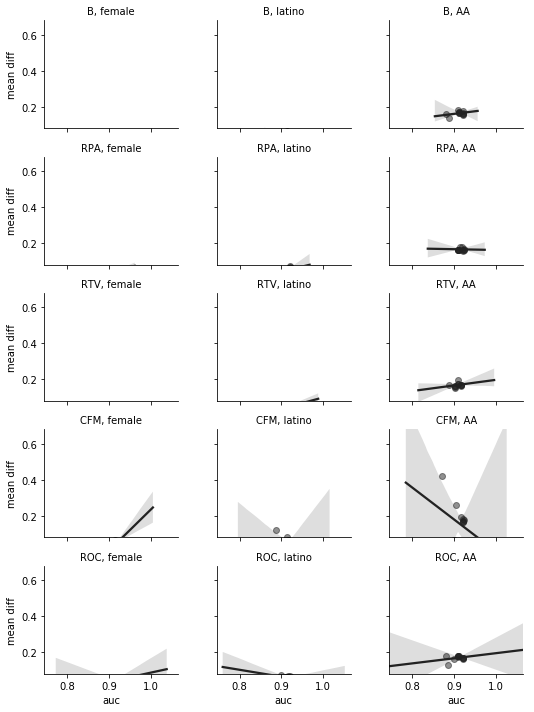

In [0]:
black_palette = sns.color_palette(["#222222"])

def plot_utility_fairness_tradeoff(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    sns_ax = sns.regplot(x=x, y=y, data=data, scatter_kws={'alpha':0.5},
                         **kwargs)
    (corr, p_val), ci = compute_corr_pearson(data[x], data[y])
    r_text = 'r = %0.02f (%0.02f, %0.02f)' % \
        (corr, ci[0], ci[1])
    sns_ax.annotate(
        r_text, xy=(0.7, 0),
        xytext=(0.07, 0.91),
        textcoords='axes fraction',
        fontweight="bold",
        fontsize=9,
        color="gray"
    )
    bottom_padding = 0.05
    top_padding = 0.5
    ylim = (data[y].min() - bottom_padding, data[y].max() + top_padding)
    sns_ax.set_ylim(*ylim)


g = sns.FacetGrid(
    (
        compare_experiments
        .drop("cv_fold", axis=1)
        .reset_index()
        .query("fold_type == 'test'")
        .rename(
            columns={"mean_diff": "mean diff"})
    ),
    col="protected_class",
    row="experiment",
    hue="experiment",
    size=2.0, aspect=1.3, sharey=True,
    palette=black_palette)
g.map_dataframe(plot_utility_fairness_tradeoff, "auc", "mean diff")
g.set_titles(template="{row_name}, {col_name}")
g.fig.tight_layout()
